In [1]:
import sys 
sys.executable

# home/abhiyush/anaconda3/env/abhiyush4/bin/python

'/home/abhiyush/anaconda3/envs/abhiyush4/bin/python'

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!conda install opencv


In [3]:

train_df = pd.read_csv("/media/abhiyush/New Volume/AI developers Nepal/Kaggle-MNIST/train.csv")
test_df = pd.read_csv("/media/abhiyush/New Volume/AI developers Nepal/Kaggle-MNIST/test.csv")



In [4]:
train_df.head(2)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df_X = train_df.drop("label", axis = 1)

In [6]:
X_train = train_df_X.values
X_test = test_df.values
y_train = train_df["label"].values

In [7]:
X_train.shape

(42000, 784)

In [8]:
X_train_images = X_train.reshape(-1,28,28) #-1 le auto adjust garcha

Random_index: 41556
0


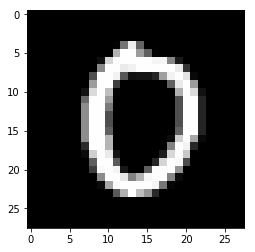

In [9]:
random_index = np.random.randint(0, len(y_train)) #0 to 42k ko bich ma random value lincha
print("Random_index:", random_index)
plt.imshow(X_train_images[random_index], cmap = "gray")
print(y_train[random_index])

In [10]:
(abc, cmap = "gray")img = X_train_images[random_index]
img.shape

SyntaxError: invalid syntax (<ipython-input-10-9260c21a4999>, line 1)

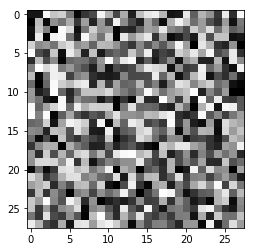

In [11]:
abc = np.random.randint(0,255, (28,28))
plt.imshow(abc, cmap = "gray")

In [12]:
print(abc)

[[ 22  22 245 195 205 122   7  54  73 241 176  72 169  31 189 228 236 180
   20  25 228  94 177 146  56 234  46 246]
 [  1 186  11 143 114 170  57 158  36 150  58 238 140  70  32 160 105  13
  171 239 195 110 155  83  49 154  18 120]
 [ 17 195 129   0 250 217  15 116 205 146 153   3  42  37  99 160 149 229
  134 118  75 203 154 220 109 177  92 111]
 [ 14 235   0 241 247 117  30 246 177 114 207   4 229 154 197 231  50 159
   11  31  72  25 214  78 194 194  16  23]
 [207 138 151 114 198 221 141 158  99 184 179 145  86  54 135  83 133  87
  147 243 158   0 228 178  51  36 147   1]
 [248  77  50 197  15 234 183  34 191  26  83 102  85 197 131 236  39  68
   53 207 181 230 165 243  73  99 231  49]
 [ 45 187  76 138   6 105 115 111  75 148 245 129 230 245  36  92  26  76
  138  17 147 175  34  32 179  18 231 138]
 [124 253 215 238 123 151 107  82  30 138  19  76  59  73 159 231 217 205
   18 142  58  67 239 104 152  50  14 241]
 [186  11 118 237 232  66 127 147  48  31  26  33 130  72  74  7

# importing the keras module

In [13]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

/home/abhiyush/anaconda3/envs/abhiyush4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
def create_model():
    m = Sequential()
    m.add(Dense(16, input_dim = 784, activation = "relu")) #16 bhaneko no of nodes in 1st layer
    m.add(Dense(16, activation = "relu")) #16 bhaneko no of nodes in 2nd layer
    m.add(Dense(10, activation = "softmax")) #10 bhaneko no. of digits
    
    return m

In [15]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss = "categorical_crossentropy", optimizer=SGD(lr = 0.000000001), metrics = ["acc"])

In [ ]:
model.compile(loss = "mse", optimizer=SGD(lr = 0.001), metrics = ["acc"]) #mae = mean absolute error

In [17]:
from keras.utils import np_utils

In [18]:
y_1h = np_utils.to_categorical(y_train)

In [19]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [20]:
y_1h

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
y_1h.shape

(42000, 10)

In [47]:
history = model.fit(X_train, y_1h, epochs=400, batch_size=2) #batch size bhaneko ek choti ma kati ota images line so that ram memory dherai nakhaos

Epoch 1/400
42000/42000 [==============================] - 4s 103us/step - loss: 0.7042 - acc: 0.7716
Epoch 2/400
42000/42000 [==============================] - 4s 101us/step - loss: 0.7042 - acc: 0.7716
Epoch 3/400
42000/42000 [==============================] - 4s 101us/step - loss: 0.7042 - acc: 0.7716
Epoch 4/400
42000/42000 [==============================] - 4s 102us/step - loss: 0.7042 - acc: 0.7716
Epoch 5/400
42000/42000 [==============================] - 4s 103us/step - loss: 0.7042 - acc: 0.7716
Epoch 6/400
42000/42000 [==============================] - 4s 102us/step - loss: 0.7042 - acc: 0.7716
Epoch 7/400
42000/42000 [==============================] - 4s 103us/step - loss: 0.7042 - acc: 0.7716
Epoch 8/400
42000/42000 [==============================] - 4s 102us/step - loss: 0.7042 - acc: 0.7716
Epoch 9/400
42000/42000 [==============================] - 4s 104us/step - loss: 0.7042 - acc: 0.7716
Epoch 10/400
42000/42000 [==============================] - 4s 104us/step - loss: 

42000/42000 [==============================] - 4s 96us/step - loss: 0.7042 - acc: 0.7716
Epoch 81/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 82/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 83/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 84/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 85/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 86/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 87/400
42000/42000 [==============================] - 4s 96us/step - loss: 0.7042 - acc: 0.7716
Epoch 88/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 89/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 

42000/42000 [==============================] - 4s 101us/step - loss: 0.7042 - acc: 0.7716
Epoch 160/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 161/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 162/400
42000/42000 [==============================] - 4s 99us/step - loss: 0.7042 - acc: 0.7716
Epoch 163/400
42000/42000 [==============================] - 4s 95us/step - loss: 0.7042 - acc: 0.7716
Epoch 164/400
42000/42000 [==============================] - 4s 98us/step - loss: 0.7042 - acc: 0.7716
Epoch 165/400
42000/42000 [==============================] - 4s 98us/step - loss: 0.7042 - acc: 0.7716
Epoch 166/400
42000/42000 [==============================] - 4s 101us/step - loss: 0.7042 - acc: 0.7716
Epoch 167/400
42000/42000 [==============================] - 4s 100us/step - loss: 0.7042 - acc: 0.7716
Epoch 168/400
42000/42000 [==============================] - 4s 98us/step - loss: 0.

42000/42000 [==============================] - 4s 105us/step - loss: 0.7042 - acc: 0.7716
Epoch 239/400
42000/42000 [==============================] - 4s 100us/step - loss: 0.7042 - acc: 0.7716
Epoch 240/400
42000/42000 [==============================] - 4s 99us/step - loss: 0.7042 - acc: 0.7716
Epoch 241/400
42000/42000 [==============================] - 4s 97us/step - loss: 0.7042 - acc: 0.7716
Epoch 242/400
42000/42000 [==============================] - 4s 98us/step - loss: 0.7042 - acc: 0.7716
Epoch 243/400
42000/42000 [==============================] - 4s 93us/step - loss: 0.7042 - acc: 0.7716
Epoch 244/400
42000/42000 [==============================] - 4s 93us/step - loss: 0.7042 - acc: 0.7716
Epoch 245/400
42000/42000 [==============================] - 4s 93us/step - loss: 0.7042 - acc: 0.7716
Epoch 246/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 247/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7

42000/42000 [==============================] - 4s 91us/step - loss: 0.7042 - acc: 0.7716
Epoch 318/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 319/400
42000/42000 [==============================] - 4s 93us/step - loss: 0.7042 - acc: 0.7716
Epoch 320/400
42000/42000 [==============================] - 4s 93us/step - loss: 0.7042 - acc: 0.7716
Epoch 321/400
42000/42000 [==============================] - 4s 94us/step - loss: 0.7042 - acc: 0.7716
Epoch 322/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 323/400
42000/42000 [==============================] - 4s 91us/step - loss: 0.7042 - acc: 0.7716
Epoch 324/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 325/400
42000/42000 [==============================] - 4s 91us/step - loss: 0.7042 - acc: 0.7716
Epoch 326/400
42000/42000 [==============================] - 4s 93us/step - loss: 0.704

42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 397/400
42000/42000 [==============================] - 4s 93us/step - loss: 0.7042 - acc: 0.7716
Epoch 398/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 399/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716
Epoch 400/400
42000/42000 [==============================] - 4s 92us/step - loss: 0.7042 - acc: 0.7716


In [25]:
def vis(h):
    loss = h.history["loss"]
    plt.plot(loss)
    plt.grid()

In [44]:
def visualize_accuracy(a):
    accuracy = a.history["acc"]
    plt.plot(accuracy)
    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

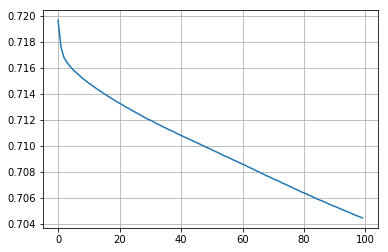

In [26]:
vis(history)

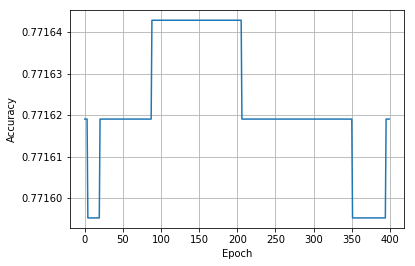

In [48]:
visualize_accuracy(history)

In [27]:
predictions = model.predict(X_test)

In [28]:
X_test.shape

(28000, 784)

In [29]:
X_train.shape

(42000, 784)

In [30]:
test_X_image = X_test.reshape(-1, 28,28)

[0 1 2 3 4 5 6 7 8 9]
[0.05 0.08 0.07 0.1  0.09 0.1  0.06 0.09 0.18 0.18]


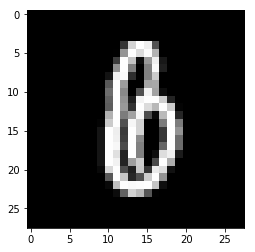

In [40]:
random_index = np.random.randint(0, len(X_test))
print(np.arange(10))
print(np.round(predictions[random_index], decimals = 2))
plt.imshow(test_X_image[random_index], cmap = "gray")